In [51]:
import geopandas as gpd
import pandas as pd

In [52]:
regions = gpd.read_file("../../geospatial-learn-course-data/ghana/ghana/Regions/Map_of_Regions_in_Ghana.shp")
# regions = regions.to_crs("+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs")
print(regions.crs)

EPSG:32630


In [53]:
facilities_df = pd.read_csv("../../geospatial-learn-course-data/ghana/ghana/health_facilities.csv")
facilities = gpd.GeoDataFrame(facilities_df, geometry=gpd.points_from_xy(facilities_df.Longitude, facilities_df.Latitude))
facilities.crs = 'EPSG:4326'
# display(facilities)
facilities = facilities.to_crs(epsg=32630)

<Axes: >

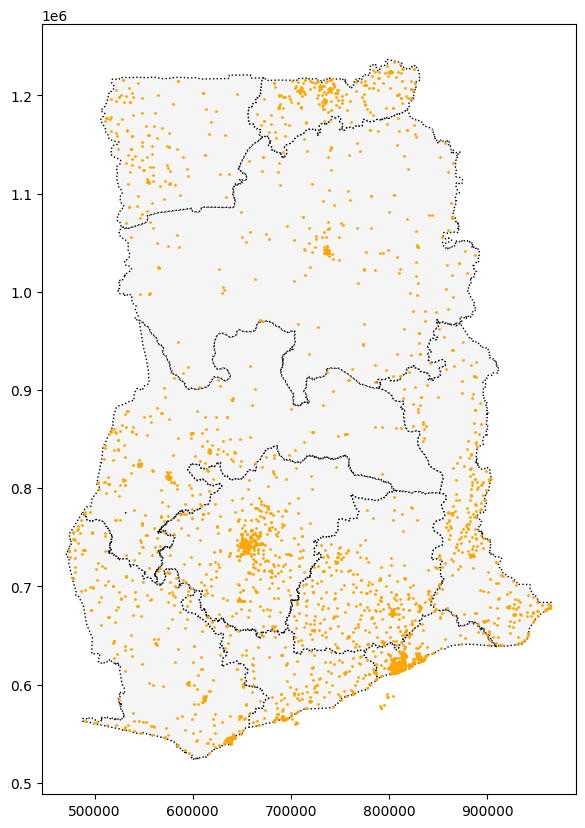

In [54]:
ax = regions.plot(figsize=(10,10), color='whitesmoke', edgecolor='black', zorder=1, linestyle=':')
facilities.plot(ax=ax, markersize=1, color='orange', zorder=2)

In [55]:
print(facilities.geometry.x)
print(facilities.geometry)

0       614422.661515
1       656373.862730
2       682573.395292
3       653484.490296
4       653484.490296
            ...      
3751              NaN
3752              NaN
3753              NaN
3754              NaN
3755              NaN
Length: 3756, dtype: float64
0       POINT (614422.662 818986.851)
1       POINT (656373.863 714616.547)
2       POINT (682573.395 688243.477)
3        POINT (653484.49 756478.812)
4        POINT (653484.49 756478.812)
                    ...              
3751                      POINT EMPTY
3752                      POINT EMPTY
3753                      POINT EMPTY
3754                      POINT EMPTY
3755                      POINT EMPTY
Name: geometry, Length: 3756, dtype: geometry


In [56]:
regions.loc[:,"AREA"] = regions.geometry.area / 10**6
print(regions)
print(f"Area of Ghana: {regions.AREA.sum()} square kilometers")

          Region                                           geometry  \
0        Ashanti  POLYGON ((686446.075 842986.894, 686666.193 84...   
1    Brong Ahafo  POLYGON ((549970.457 968447.094, 550073.003 96...   
2        Central  POLYGON ((603176.584 695877.238, 603248.424 69...   
3        Eastern  POLYGON ((807307.254 797910.553, 807311.908 79...   
4  Greater Accra  POLYGON ((858081.638 676424.913, 858113.115 67...   
5       Northern  POLYGON ((818287.468 1185632.455, 818268.664 1...   
6     Upper East  POLYGON ((811994.328 1230449.528, 812004.699 1...   
7     Upper West  POLYGON ((658854.315 1220818.656, 659057.21 12...   
8          Volta  POLYGON ((899718.788 875120.098, 899564.444 87...   
9        Western  POLYGON ((490349.315 771271.143, 490530.091 77...   

           AREA  
0  24379.017777  
1  40098.168231  
2   9665.626760  
3  18987.625847  
4   3706.511145  
5  69830.576358  
6   8629.357677  
7  19022.080963  
8  20948.296066  
9  24317.315180  
Area of Ghana: 23958